In [157]:
import numpy as np
import pandas as pd



FOPI is bounded to values between 0 and 1 which ease its interpretation in terms
of probability of occurrence. To understand how the weather and fuel components
contribute to the FOPI, it is important to examine terms A and B of equation 1 in
isolation. Thus, figures show hhow FOPI changes as a function of VOD for three
different values of FWI and  how FOPI is controlled by FWI at three
different VOD thresholds.

In [158]:
hex_list =["#ffffff","#fffcf2","#84dcc6","#a5ffd6","#f4d35e","#ffa69e","#ff686b","#eb5e28"]


In [159]:
F,a,b,x0,y0=1. , 0.56716912 ,3.11504565 ,0.64580504 ,5.47653683 
def _fopi(x,y,F, a,b,x0,y0):
    arr = np.zeros(x.shape)
    arr = F*np.exp( -((x-x0)/a)**4 -((y-y0)/b)**4 )  
    return arr


[0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
[ 2.03089803  3.26244676  4.5777248   3.40819536  2.464597    4.85455151
  2.18483813  3.78871995  1.89884595  3.29747255  2.16020653  1.89162888
  0.39203559  3.56827118  2.29549683  2.8923952   3.82037042  4.17389019
  2.04671645  3.2452332   2.62726919  1.93630449  3.58338292  3.60328632
  3.24706131  2.43788284  2.20573     2.97346653  1.75250386  3.84256245
  4.07759978  2.54405975  2.75165511  3.44548544  2.21489257  1.75681858
  2.88301978  4.4735059   2.91834925  2.55681143  2.22788752  3.00282213
  1.62704381 -0.19649335  4.44392737  5.33509032  4.45573263  3.12771701
  2.63022675  3.7902941 ]
[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6
 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6

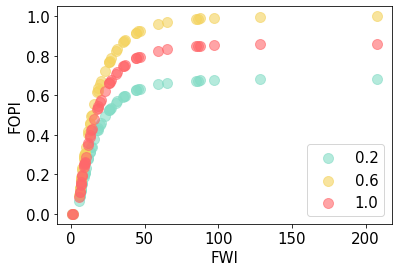

In [174]:
mu, sigma = 3., 1.# mean and standard deviation
fwi = np.random.lognormal(mu, sigma, 50)
#Display the histogram of the samples, along with the probability density function:
fwi[fwi == 0]=0.001

#import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
fig = plt.figure()
ax = fig.add_subplot(111)

lvod=[0.2,0.6,1.0]
N=len(lvod)+1
df=pd.DataFrame(columns=['fwi','vod','fopi'])
col=get_continuous_cmap(hex_list)
df2=pd.DataFrame(columns=['fwi','vod','fopi'])
index=2
for v in lvod :
    vod=fwi.copy()
    vod[:]=v
    f=np.log(fwi)
    print(vod)
    print(f)
    fopi=_fopi(vod,f,F, a,b,x0,y0)
    df2=pd.DataFrame(columns=['fwi','vod','fopi'])
    df2['vod']=vod
    df2['fwi']=fwi
    df2['fopi']=fopi
    df=df.append(df2, ignore_index=True)
    plt.scatter(df2.fwi, df2.fopi,s=100, alpha=0.6,color=hex_list[index],label=v)
    index=index+2


ax.legend(loc='lower right',)
plt.title("")
plt.xlabel("FWI")
plt.ylabel("FOPI")
plt.savefig('/home/nen/scripts/efi/fopi/fopi_sensitivity_to_vod.svg', format='svg', dpi=1200)
plt.show()


[1.4225968  1.78818515 0.62671993 0.6271315  0.43607614 0.9698749
 1.86120654 1.33183997 1.75364997 1.13794373 1.19259165 1.43738124
 1.85700124 1.77280523 0.69422567 0.64584641 1.56994567 0.20417503
 1.15744717 1.27401864 1.85072629 0.63349071 1.75896099 0.49297285
 0.04284482 1.95014024 1.18449533 0.30838247 1.77371673 1.07235781
 1.31946723 1.1100551  1.72485544 1.7962973  0.42102501 1.57423499
 1.47669372 0.13235534 1.43698488 0.73419076 1.38241827 0.68528774
 1.50517188 0.43799434 0.70615464 1.79896531 1.52690976 1.40977227
 1.03829994 0.15672654]
[2.99573227 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227
 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227
 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227
 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227
 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227
 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227 2.99573227
 2.99573227 2.99573227 2.99573227 2.995

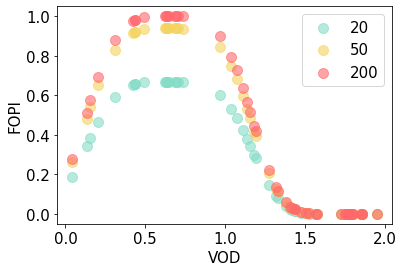

In [171]:
vod = np.random.uniform(0, 2, 50)

#import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
fig = plt.figure()
ax = fig.add_subplot(111)

lfwi=[20,50,200]
col=get_continuous_cmap(hex_list)
df2=pd.DataFrame(columns=['fwi','vod','fopi'])
index=2
for f in lfwi :
    fwi=vod.copy()
    fwi[:]=np.log(f)
    print(vod)
    print(fwi)
    fopi=_fopi(vod,fwi,F, a,b,x0,y0)
    df2=pd.DataFrame(columns=['fwi','vod','fopi'])
    df2['vod']=vod
    df2['fwi']=fwi
    df2['fopi']=fopi
    df=df.append(df2, ignore_index=True)
    plt.scatter(df2.vod, df2.fopi,s=100, alpha=0.6,color=hex_list[index],label=f)
    index=index+2


ax.legend(loc='upper right',)
plt.title("")
plt.xlabel("VOD")
plt.ylabel("FOPI")
plt.savefig('/home/nen/scripts/efi/fopi/fopi_sensitivity_to_fwi.svg', format='svg', dpi=1200)
plt.show()

In [164]:
vod = np.random.uniform(0, 2, 20)

array([1.28100758, 0.88143484, 0.62963656, 0.03872161, 0.07825262,
       0.6555099 , 1.72781147, 0.33580148, 1.65821447, 0.62078567,
       1.33230308, 0.75959301, 1.7004795 , 0.79955203, 1.00035048,
       0.11126841, 0.87340582, 1.1972942 , 0.83283327, 0.77106987])